<h1 style="text-align: center;">ENCS5341 Machine Learning and Data Science</h1>
<h2 style="text-align: center;">Mohammad Abu Shams 1200549</h2>
<h2 style="text-align: center;">Mohammed Owda 1200089</h2>
<h2 style="text-align: center;">Section: 2</h2>
<h2 style="text-align: center;">Dr. Yazan Abu Farha </h2>
<h2 style="text-align: center;">26/1/2024</h2>





#  Exploratory Analysis

Dataset Description:
Number of Rows: 395
Number of Columns: 33

First 5 Rows of the Dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2 G3  
0      4        3      4     1     1      3        6   5   6  0  
1      5        3      3     1     1      3        4   5   5  0  
2      4        3      2     2     3      3       10   7   8  1  
3      3        2      2     1     1      5        2  15  14  1  
4      4        3      2     1     2      5        4   6  10  1  

[5 rows x 33 columns]



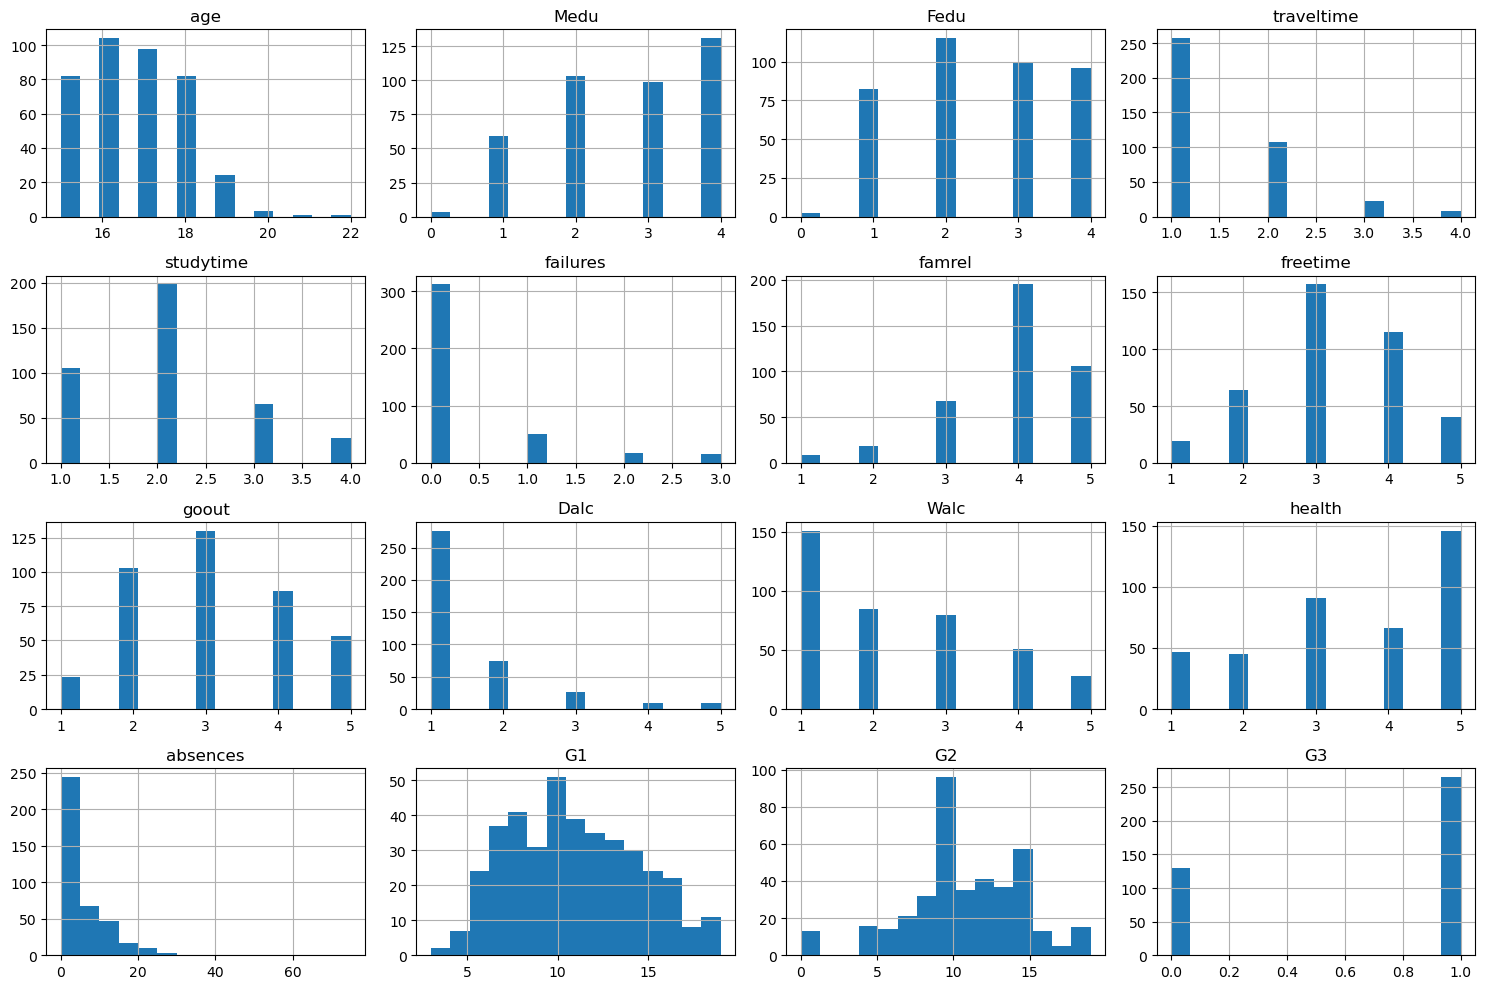

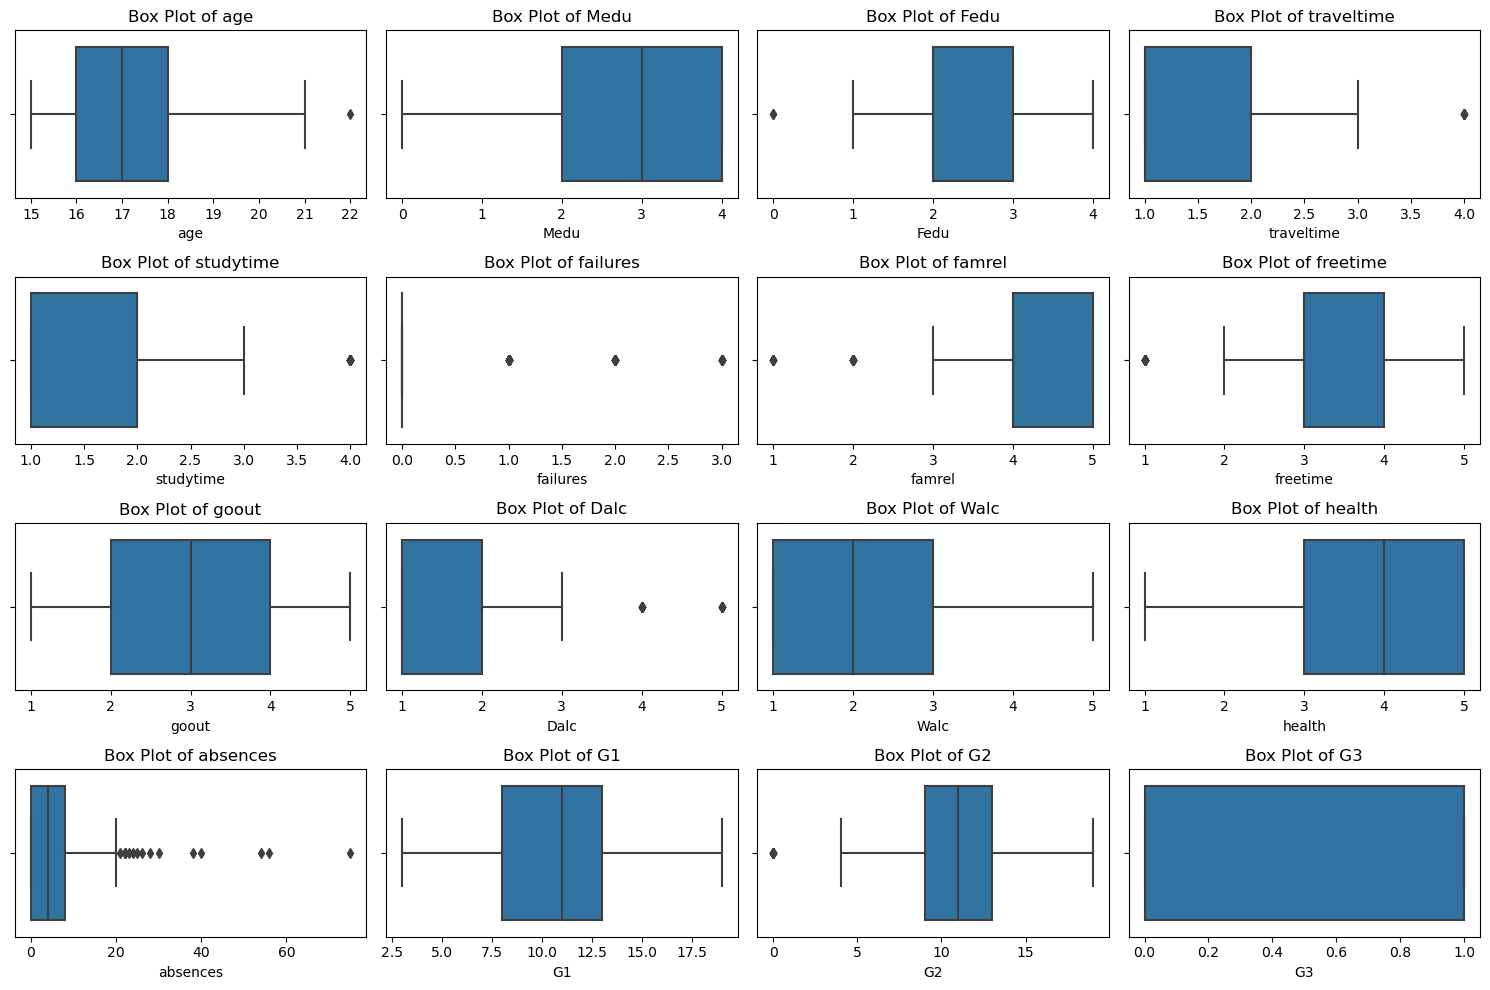

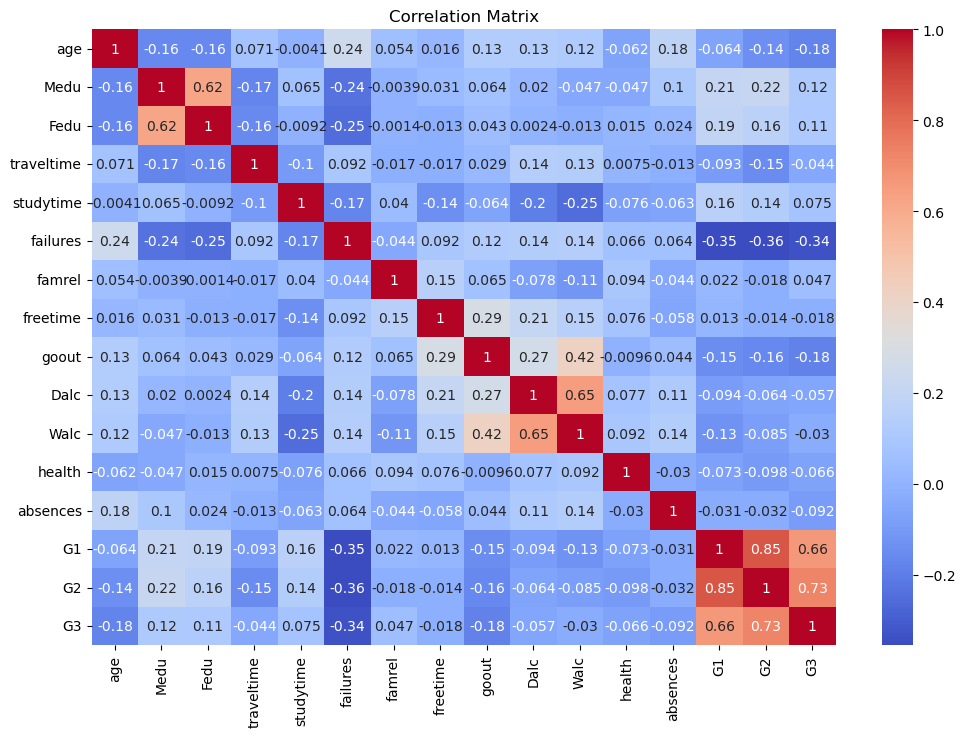

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data set
file_path = 'student-mat.csv' 
data = pd.read_csv(file_path, delimiter=';')

# Transform 'G3' into a binary classification target (pass/fail)
data['G3'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Dataset Description
print("Dataset Description:")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Data Visualization: Histograms for numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Correlation Matrix Heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#  Baseline Model

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the data into training and testing sets (for feature selection)
target = 'G3'
X_encoded = data_encoded.drop(target, axis=1)
y_encoded = data_encoded[target]
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=0)

# Use Random Forest Classifier to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_encoded, y_train_encoded)
feature_importances = rf.feature_importances_

# Selecting top N features based on importance 
top_n_features = 10
top_features_indices = np.argsort(feature_importances)[-top_n_features:]
top_features = X_train_encoded.columns[top_features_indices]

# Selecting features and target using the one-hot encoded DataFrame with top features
X = data_encoded[top_features]
y = data_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating a preprocessor with StandardScaler for numerical features and OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Defining the KNN model with k=1 using Manhattan distance
knn_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=1, metric='manhattan'))
])

# Defining the KNN model with k=3 using Manhattan distance
knn_3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3, metric='manhattan'))
])

# Training and evaluating k=1 model
knn_1.fit(X_train, y_train)
y_pred_1_train = knn_1.predict(X_train)
y_pred_1_test = knn_1.predict(X_test)
accuracy_k1_train = accuracy_score(y_train, y_pred_1_train)
accuracy_k1_test = accuracy_score(y_test, y_pred_1_test)

# Training and evaluating k=3 model
knn_3.fit(X_train, y_train)
y_pred_3_train = knn_3.predict(X_train)
y_pred_3_test = knn_3.predict(X_test)
accuracy_k3_train = accuracy_score(y_train, y_pred_3_train)
accuracy_k3_test = accuracy_score(y_test, y_pred_3_test)

print("==================== KNN 1 ====================")
# Classification report and confusion matrix for k=1 model
print("K1 Training Accuracy:", round(accuracy_k1_train, 3))
print("K1 Test Accuracy:", round(accuracy_k1_test, 3))

print("\nK1 Model Classification Report:")
print(classification_report(y_test, y_pred_1_test))
print("K1 Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_1_test))

print("==================== KNN 3 ====================")
# Classification report and confusion matrix for k=3 model
print("K3 Training Accuracy:", round(accuracy_k3_train, 3))
print("K3 Test Accuracy:", round(accuracy_k3_test, 3))

print("\nK3 Model Classification Report:")
print(classification_report(y_test, y_pred_3_test))
print("K3 Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_3_test))

==================== KNN 1 ====================
K1 Training Accuracy: 1.0
K1 Test Accuracy: 0.848

K1 Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.87      0.90      0.89        52

    accuracy                           0.85        79
   macro avg       0.84      0.82      0.83        79
weighted avg       0.85      0.85      0.85        79

K1 Model Confusion Matrix:
[[20  7]
 [ 5 47]]
==================== KNN 3 ====================
K3 Training Accuracy: 0.934
K3 Test Accuracy: 0.823

K3 Model Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.85      0.88      0.87        52

    accuracy                           0.82        79
   macro avg       0.81      0.79      0.80        79
weighted avg       0.82      0.82      0.82        79

K3 Model Confusion Matrix:
[[19  8]


C:\Users\NouR Al-ShaM\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\NouR Al-ShaM\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

#  The proposed ML models

## 1. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Assume top_features is a list of selected feature names
numerical_features = X[top_features].select_dtypes(include=['int64', 'float64']).columns
categorical_features = X[top_features].select_dtypes(include=['object']).columns

# Create a preprocessor with StandardScaler for numerical features and OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Random Forest Classifier
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning for Random Forest
param_grid_rf = {'classifier__n_estimators': [50, 100, 150, 200]}
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train[top_features], y_train)
best_rf = grid_search_rf.best_estimator_
accuracy_rf_train = accuracy_score(y_train, best_rf.predict(X_train[top_features]))
accuracy_rf_test = accuracy_score(y_test, best_rf.predict(X_test[top_features]))


# Print best parameters and accuracies
print("==================== Random Forest ====================")
print("Random Forest - Best Params:", grid_search_rf.best_params_)
print("Random Forest - Training Accuracy:", accuracy_rf_train)
print("Random Forest - Testing Accuracy:", accuracy_rf_test)

print("\nTesting Data:")
print(classification_report(y_test, rf_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred_test))

==================== Random Forest ====================
Random Forest - Best Params: {'classifier__n_estimators': 200}
Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.9240506329113924

Testing Data:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.96      0.92      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.92      0.92        79
weighted avg       0.93      0.92      0.92        79

Confusion Matrix:
[[25  2]
 [ 4 48]]


## 2. Logistic Regression

In [52]:
# Logistic Regression
logreg_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {'classifier__C': [0.1, 1, 10, 100]}
grid_search_logreg = GridSearchCV(logreg_classifier, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train[top_features], y_train)
best_logreg = grid_search_logreg.best_estimator_
accuracy_logreg_train = accuracy_score(y_train, best_logreg.predict(X_train[top_features]))
accuracy_logreg_test = accuracy_score(y_test, best_logreg.predict(X_test[top_features]))

print("==================== Logistic Regression ====================")
print("Logistic Regression - Best Params:", grid_search_logreg.best_params_)
print("Logistic Regression - Training Accuracy:", accuracy_logreg_train)
print("Logistic Regression - Testing Accuracy:", accuracy_logreg_test)
print("\nTesting Data:")
print(classification_report(y_test, logreg_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg_pred_test))


==================== Logistic Regression ====================
Logistic Regression - Best Params: {'classifier__C': 10}
Logistic Regression - Training Accuracy: 0.9335443037974683
Logistic Regression - Testing Accuracy: 0.9113924050632911

Testing Data:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.96      0.90      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.92      0.91      0.91        79

Confusion Matrix:
[[25  2]
 [ 5 47]]


#  Performance analysis

errors instances: 
     freetime  Fedu  Medu  Walc  goout  age  failures  absences  G1  G2  \
78          5     1     2     1      1   17         3         2   8   8   
375         3     1     1     2      2   18         0         2   8   8   
377         4     4     4     4      3   18         0         4   8   9   
157         2     1     1     5      5   18         3         6   9   8   
317         3     3     4     1      4   18         0         9   9  10   
114         4     1     2     1      2   15         0         8   9   9   

     Actual  Predicted  Error  
78        1          0   True  
375       1          0   True  
377       1          0   True  
157       1          0   True  
317       0          1   True  
114       0          1   True  
Error Instances Analysis:
       freetime      Fedu      Medu      Walc     goout        age  failures  \
count  6.000000  6.000000  6.000000  6.000000  6.000000   6.000000  6.000000   
mean   3.500000  1.833333  2.333333  2.333333

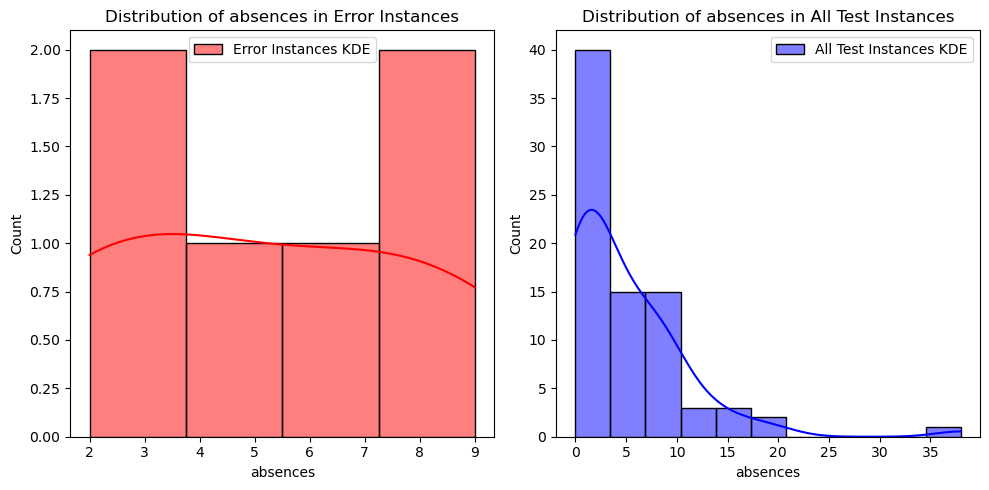

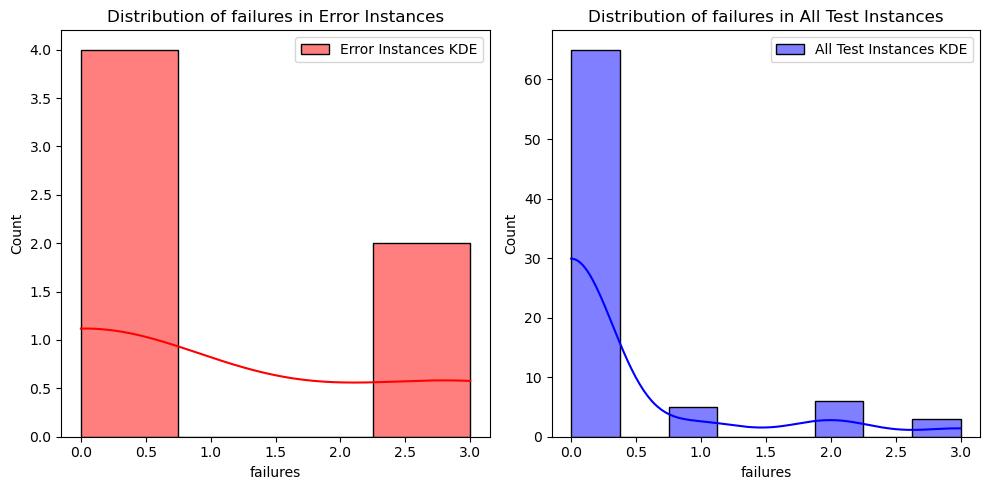

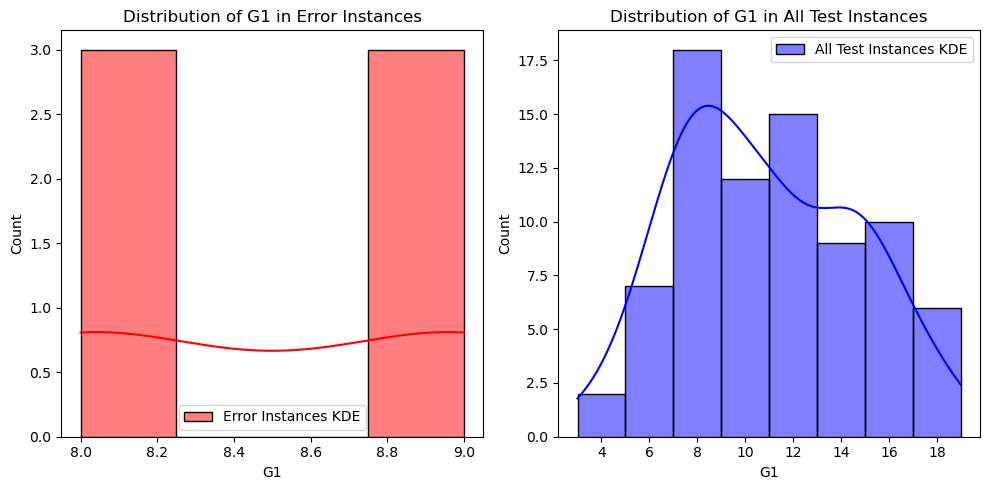

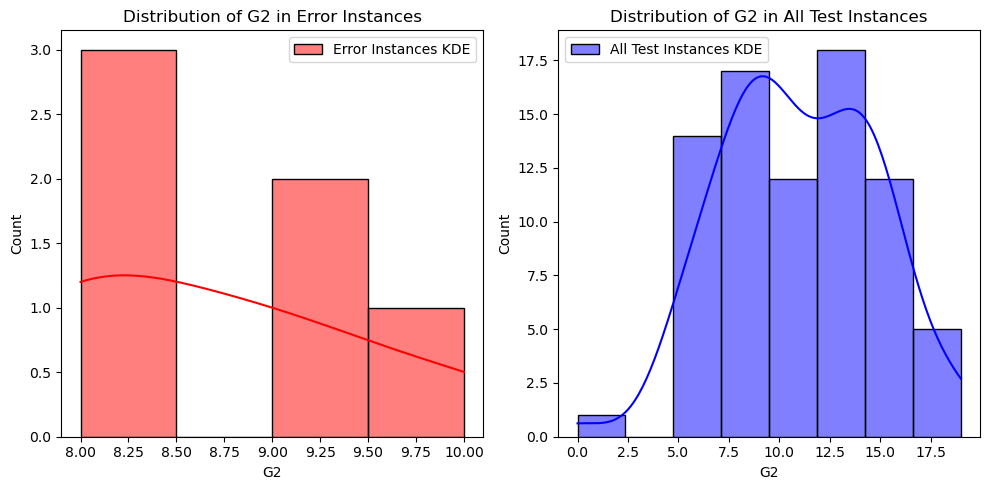

In [54]:
# Predictions on the test set using the best model
rf_predictions_test = best_rf.predict(X_test[top_features])

# Create a DataFrame to analyze errors
error_analysis_df = X_test[top_features].copy()
error_analysis_df['Actual'] = y_test
error_analysis_df['Predicted'] = rf_predictions_test
error_analysis_df['Error'] = error_analysis_df['Actual'] != error_analysis_df['Predicted']

# Filter to only error instances
error_instances = error_analysis_df[error_analysis_df['Error']]

# Display the first few error instances for analysis.
print("errors instances: ")
print(error_instances)
# Analyze error instances
print("Error Instances Analysis:")
print(error_instances.describe())

# Analyzing distribution of a specific feature in error instances
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['absences', 'failures', 'G1', 'G2']

# Plot the distribution for each feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(error_instances[feature], kde=True, color='red', label='Error Instances KDE')
    plt.title(f'Distribution of {feature} in Error Instances')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.histplot(X_test[top_features][feature], kde=True, color='blue', label='All Test Instances KDE')
    plt.title(f'Distribution of {feature} in All Test Instances')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
